In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import re
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
##### Gathering data #####

In [3]:
# Manually download and open the file
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
# Download image.predictions.tsv file using request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

In [5]:
# write the downloaded file in to image.predictions.tsv
file_name = url.split('/')[-1]

with open(file_name,'wb') as f:
    f.write(r.content)

In [6]:
# open and read the downloaded image.predictions.tsv file
df_image_predictions = pd.read_csv(file_name,sep='\t')

df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# get the consumer and acces token and keys
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [8]:
#Get tweet id's in a list 
tweet_id = []
for items in df_twitter_enhanced.values:
    tweet_id.append(items[0])
    
print(len(tweet_id))

2356


In [9]:
# Get the json data for the tweet id's and store the data in the form of list
json_file = 'tweet_json.txt'
err= {}
tlist=[]

for t in tweet_id:
    try:
        ranking = tweet_id.index(t) + 1
        tweet = api.get_status(t,tweet_mode = 'extended')
        tweet = tweet._json
        tlist.append({'ranking': int(ranking),
                      'tweet_id': t,
                      'json_data': tweet})
    except tweepy.TweepError as e:
        print(e)
        

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 738
Rate limit reached. Sleeping for: 738


In [10]:
# Dump the list in to a text file tweet_json.txt
with open(json_file,'w+') as f:
        json.dump(tlist,f,indent=4)

In [11]:
# Read the text file tweet_json.txt
with open('tweet_json.txt') as j_file:
    data = json.load(j_file)

In [12]:
# Extract rank,tweet_id,retweet_count and favourite count from the json.txt file and create a dictionary
new_list=[]
for d in data:
    new_list.append({'ranking':d['ranking'],
                     'tweet_id':d['tweet_id'],
                     'retweet_count':d['json_data']['retweet_count'],
                     'favourite_count':d['json_data']['favorite_count'],
                     'timestamp':d['json_data']['created_at']
        })
    
    

In [13]:
# convert the dictionary in to a dataframe and save.

df_tweet_api = pd.DataFrame(new_list,columns=['ranking','tweet_id','retweet_count','favourite_count','timestamp'])
df_tweet_api = df_tweet_api.sort_values('ranking').reset_index(drop=True)
df_tweet_api.tail()

,ranking,tweet_id,retweet_count,favourite_count,timestamp
2340,2352,666049248165822465,40,109,Mon Nov 16 00:24:50 +0000 2015
2341,2353,666044226329800704,141,299,Mon Nov 16 00:04:52 +0000 2015
2342,2354,666033412701032449,44,125,Sun Nov 15 23:21:54 +0000 2015
2343,2355,666029285002620928,47,130,Sun Nov 15 23:05:30 +0000 2015
2344,2356,666020888022790149,518,2563,Sun Nov 15 22:32:08 +0000 2015


In [14]:
##### Assesing data #####

In [15]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_twitter_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 5 columns):
ranking            2345 non-null int64
tweet_id           2345 non-null int64
retweet_count      2345 non-null int64
favourite_count    2345 non-null int64
timestamp          2345 non-null object
dtypes: int64(4), object(1)
memory usage: 91.7+ KB


In [23]:
df_tweet_api.describe()

,ranking,tweet_id,retweet_count,favourite_count
count,2345.000000,2.345000e+03,2345.000000,2345.000000
mean,1182.720256,7.422940e+17,3030.258422,8077.386354
std,678.891495,6.833642e+16,5040.437015,12152.886816
min,1.000000,6.660209e+17,0.000000,0.000000
25%,597.000000,6.783802e+17,607.000000,1405.000000
50%,1184.000000,7.189392e+17,1415.000000,3544.000000
75%,1770.000000,7.986979e+17,3531.000000,9984.000000
max,2356.000000,8.924206e+17,77466.000000,143549.000000


In [25]:
#let's look at the duplicated values
all = pd.Series(list(df_twitter_enhanced)+list(df_image_predictions)+list(df_tweet_api))
all[all.duplicated()]

17     tweet_id
30     tweet_id
33    timestamp
dtype: object

In [18]:
# Quality:

#Twitter_enhanced table:
     
#1. Rating Numerator data type should be float 
#2. Rating Numerator values needs to get modified
#3. Timestamp datatype should get converted to datetime.date
#4. Type of dog datatype needs to be category type
#5. Name column has some incorrect values like a,an,The,This.
#6. Combine different types of dog stage in to a single Dog_Stage column


#Image_predictions table:
    
#7. Incorrect names are displayed Eg: paper_towel is not a dog breed
#8. confidence intervals columns can be round-off to 2 decimals to the right.

#Tweet_API table:
#9. Convert the timestamp datatype to datetime.date



#Tidiness:

#1. Tweet_api table can be merged with twitter enhanced table
#2. Image predictions table can be merged with twitter enhanced table
#3. Drop the duplicated and the unwanted columns
#4. Realign the columns in order starting from Ranking column
#5. Rename the column names for better understanding in visualization
#6. save the combined master dataframe to twitter_archive_master.csv


In [26]:
#### CLEANING THE DATA ####

In [27]:
#Copy the a temporary dataset for the cleaning purpose.

df_twitter_enhanced_clean = df_twitter_enhanced.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_api_clean = df_tweet_api.copy()

In [28]:
#::::: QUALITY ::::

# 1. Rating Numerator data type should be float

#Define:
    #Change the Rating Numerator datatype to float using astype

#Code:
df_twitter_enhanced_clean.rating_numerator = df_twitter_enhanced_clean.rating_numerator.astype(float)
    
#Test:
df_twitter_enhanced_clean.info()

#we are able to see the int data type has been changed to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [29]:
# 2. Rating Numerator needs to get modified

#Define:
    #Take the text column from twitter_enhanced table and extract only the digits and save them in a sepreate list.And then use 
#a loop to extract the first digit from the list.this will give us the rating_numerator.Finally replace the 
#existing rating_numerator with the new list.

#Code:

sf_test = df_twitter_enhanced_clean.text  #Take the text column seperately to work split

# Extract the digits from the text and save it in a temporary list
temp = []
new_rating = []
for  s in sf_test:
    temp.append(re.findall(r'\d+(?:\.\d+)?', s))
    
#Now, Extract only the rating numerator.
for a in temp:
    new_rating.append(a[0])
    
#Drop the exiting rating_numerator column
df_twitter_enhanced_clean = df_twitter_enhanced_clean.drop('rating_numerator',axis=1)

# Add the new list to the dataframe using numpy
n = np.asarray(new_rating)
df_twitter_enhanced_clean['rating_numerator'] = n

df_twitter_enhanced_clean.query('rating_numerator == "007"') 

# modify value in rating_numerator column to 7 from 007 
df_twitter_enhanced_clean.loc[df_twitter_enhanced_clean.tweet_id == 826598799820865537, 'rating_numerator'] = 7

#Test:

df_twitter_enhanced_clean['rating_numerator'].unique()

#Now,we are able to see the rating_numerato dispalyed the float values as well.

array(['13', '12', '14', '13.5', '17', '150', '11', '2195', '10', '420',
       '8', '98', '6', '236', '3', '0', '9', '4', '15', '182', '2016',
       '960', '9.75', 7, '84', '7', '24', '1', '2', '5', '46', '11.27',
       '100', '165', '50', '987', '2002', '1776', '2.0', '31', '47', '204',
       '80', '45', '400', '60', '44', '33', '97', '61', '143', '121',
       '2015', '20', '9.5', '11.26', '92.49', '144', '88', '22', '2003',
       '8.98', '1949'], dtype=object)

In [30]:
# 3. Convert timestamp column to datetime.date

#Define:
#use datetime.date to convert the timestamp column.

#Code:

df_twitter_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_enhanced_clean['timestamp']).apply(lambda x:x.date())

#Test:
df_twitter_enhanced_clean.timestamp.unique()

#Now, we can confirm that there are no tweet_id's in twitter_enhanced dataframe that are greater than 01-Aug'17'

array([datetime.date(2017, 8, 1), datetime.date(2017, 7, 31),
       datetime.date(2017, 7, 30), datetime.date(2017, 7, 29),
       datetime.date(2017, 7, 28), datetime.date(2017, 7, 27),
       datetime.date(2017, 7, 26), datetime.date(2017, 7, 25),
       datetime.date(2017, 7, 24), datetime.date(2017, 7, 23),
       datetime.date(2017, 7, 22), datetime.date(2017, 7, 21),
       datetime.date(2017, 7, 20), datetime.date(2017, 7, 19),
       datetime.date(2017, 7, 18), datetime.date(2017, 7, 17),
       datetime.date(2017, 7, 16), datetime.date(2017, 7, 15),
       datetime.date(2017, 7, 14), datetime.date(2017, 7, 13),
       datetime.date(2017, 7, 12), datetime.date(2017, 7, 11),
       datetime.date(2017, 7, 10), datetime.date(2017, 7, 9),
       datetime.date(2017, 7, 8), datetime.date(2017, 7, 7),
       datetime.date(2017, 7, 6), datetime.date(2017, 7, 5),
       datetime.date(2017, 7, 4), datetime.date(2017, 7, 3),
       datetime.date(2017, 7, 2), datetime.date(2017, 7, 1),
  

In [31]:
#4. Type of dog datatype needs to be category type

#Define:
    #Change the datatype of dog type columns to category using astype
    
#Code:

df_twitter_enhanced_clean.doggo = df_twitter_enhanced_clean.doggo.astype('category')
df_twitter_enhanced_clean.floofer = df_twitter_enhanced_clean.floofer.astype('category')
df_twitter_enhanced_clean.pupper = df_twitter_enhanced_clean.pupper.astype('category')
df_twitter_enhanced_clean.puppo = df_twitter_enhanced_clean.puppo.astype('category')


#Test:

df_twitter_enhanced_clean.info()

#Dog type columns are moved to Category datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null category
floofer                       2356 non-null category
pupper                        2356 non-null category
puppo                         2356 non-null category
rating_numerator              2356 non-null object
dtypes: category(4), fl

In [32]:
#5. Name column has some in-correct values

#Define:
    #Name column has some incorrect values like (a,the,an,this,All). This can be replaced with None using str.replace command
    
#Code:

df_twitter_enhanced_clean.name = df_twitter_enhanced_clean.name.str.replace('a', 'None')
df_twitter_enhanced_clean.name = df_twitter_enhanced_clean.name.str.replace('an', 'None')
df_twitter_enhanced_clean.name = df_twitter_enhanced_clean.name.str.replace('the', 'None')
df_twitter_enhanced_clean.name = df_twitter_enhanced_clean.name.str.replace('This', 'None')
df_twitter_enhanced_clean.name = df_twitter_enhanced_clean.name.str.replace('All', 'None')

#Test:
df_twitter_enhanced_clean.query('name =="a"' or 'name =="an"' or'name =="the"' or 'name =="This"'or 'name =="All"')

#Now, all the incorrect name values has been replaced with None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator


In [33]:
#6. Combine different types of dog stage in to a single Dog_Stage column

#Define:
    # Combine different types of dog stages using fill.na option

#Code:

df_twitter_enhanced_clean.doggo = df_twitter_enhanced_clean.doggo.str.replace('None','')
df_twitter_enhanced_clean.floofer = df_twitter_enhanced_clean.floofer.str.replace('None','')
df_twitter_enhanced_clean.pupper = df_twitter_enhanced_clean.pupper.str.replace('None','')
df_twitter_enhanced_clean.puppo = df_twitter_enhanced_clean.puppo.str.replace('None','')
df_twitter_enhanced_clean['Dog_Stage'] = df_twitter_enhanced_clean[['doggo','floofer','pupper','puppo']].fillna('').sum(axis=1)
df_twitter_enhanced_clean.Dog_Stage = df_twitter_enhanced_clean.Dog_Stage.str.replace('doggopuppo','doggo')
df_twitter_enhanced_clean.Dog_Stage = df_twitter_enhanced_clean.Dog_Stage.str.replace('doggofloofer','floofer')
df_twitter_enhanced_clean.Dog_Stage = df_twitter_enhanced_clean.Dog_Stage.str.replace('doggopupper','pupper')

#Test:

df_twitter_enhanced_clean['Dog_Stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [34]:
#6. Incorrect names are displayed Eg: paper_towel is not a dog breed in Image_Predictions file


#Define:
    #Perdictions column has some invalid predictions which needs to replaced

#Code:
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.replace('electric_fan', 'None')
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.replace('web_site', 'None')
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.replace('fire_engine', 'None')
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.replace('orange', 'None')
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.replace('pencil_box', 'None')
df_image_predictions_clean.p1 = df_image_predictions_clean.p1.str.replace('paper_towl', 'None')

df_image_predictions_clean.p2 = df_image_predictions_clean.p2.str.replace('cup', 'None')
df_image_predictions_clean.p2 = df_image_predictions_clean.p2.str.replace('sports_car', 'None')
df_image_predictions_clean.p2 = df_image_predictions_clean.p2.str.replace('purse', 'None')

df_image_predictions_clean.p3= df_image_predictions_clean.p3.str.replace('car_wheel', 'None')
df_image_predictions_clean.p3 = df_image_predictions_clean.p3.str.replace('can_opener', 'None')


#Test
df_image_predictions_clean.query('p1 =="electric_fan"' or 'p1 =="web_site"')
df_image_predictions_clean.query('p2 =="sports_car"' or 'p2 =="purse"')
df_image_predictions_clean.query('p2 =="car_wheel"' or 'p2 =="can_opener"')

#Now, All those invlaid predications have been programmtically get converted to None
                                

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
#7.Confidence intervals columns can be round-off to 2 decimals

#Define
    #Round-Off the confidence intervals to 2 decimal digits using numpy

#Code
df_image_predictions_clean.p1_conf = np.round(df_image_predictions_clean.p1_conf,decimals=2)
df_image_predictions_clean.p2_conf = np.round(df_image_predictions_clean.p2_conf,decimals=2)
df_image_predictions_clean.p3_conf = np.round(df_image_predictions_clean.p3_conf,decimals=2)

#Test
df_image_predictions_clean.head()

#Now,All the confidence intervals are round off to 2 decimal points

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [36]:
#8. Convert timestamp column of tweet_api table to datetime.date

#Define:
#use datetime.date to convert the timestamp column.

#Code:

df_tweet_api_clean['timestamp'] = pd.to_datetime(df_tweet_api_clean['timestamp']).apply(lambda x:x.date())

#Test:
df_tweet_api_clean.tail(5)

#Now, we can confirm that there are no tweet_id's in tweet_api dataframe that are greater than 01-Aug'17'

,ranking,tweet_id,retweet_count,favourite_count,timestamp
2340,2352,666049248165822465,40,109,2015-11-16
2341,2353,666044226329800704,141,299,2015-11-16
2342,2354,666033412701032449,44,125,2015-11-15
2343,2355,666029285002620928,47,130,2015-11-15
2344,2356,666020888022790149,518,2563,2015-11-15


In [37]:
#::::: TIDINESS ::::

In [38]:
#1,2.  Merge all the 3 dataframes in to a single master dataframe twitter_archive_master

#Define:
    #Merge all the 3 dataframes() in to a single master dataframe twitter_archive_master using merge command 
#with tweet_id as the key

#Code:

#Merge df_tweet_api_clean dataframe on df_twitter_enhanced_clean dataframe using tweet_id
twitter_archive_master = pd.merge(df_twitter_enhanced_clean, df_tweet_api_clean,
                            on=['tweet_id'], how='left')

#Merge twitter_archive_master dataframe on df_image_predictions_clean dataframe using tweet_id
twitter_archive_master = pd.merge(twitter_archive_master, df_image_predictions_clean,
                            on=['tweet_id'], how='left')

#Change the Rating_numerator to float
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.astype('float')

#Test:
twitter_archive_master.info()

#Now we sucessfully created the master data frame called twitter_archive_master. Now, lets to tidiness work on the master
#dataframe and remove unwanted and duplicate columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp_x                   2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating_numerator              2356 non-null float64
Dog_Stage                     

In [39]:
#3. Drop the Duplicate and unwanted columns for our Visualization analysis

#Define:
    #Let's remove duplicate columns (timestamp_y),different dog stages and unwanted columns(in_reply_to_status_id,in_reply_to_user_id,
#retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,img_num) using drop.na command
    
#Code:
#twitter_archive_master.drop(twitter_archive_master.columns['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','img_num','timestamp_y'],axis=1,inplace=True)

twitter_archive_master = twitter_archive_master.drop('in_reply_to_status_id', axis=1)
twitter_archive_master = twitter_archive_master.drop('in_reply_to_user_id', axis=1)
twitter_archive_master = twitter_archive_master.drop('retweeted_status_id', axis=1)
twitter_archive_master = twitter_archive_master.drop('retweeted_status_user_id', axis=1)
twitter_archive_master = twitter_archive_master.drop('retweeted_status_timestamp', axis=1)
twitter_archive_master = twitter_archive_master.drop('img_num', axis=1)
twitter_archive_master = twitter_archive_master.drop('timestamp_y', axis=1)
twitter_archive_master = twitter_archive_master.drop('ranking', axis=1)
twitter_archive_master = twitter_archive_master.drop('doggo', axis=1)
twitter_archive_master = twitter_archive_master.drop('puppo', axis=1)
twitter_archive_master = twitter_archive_master.drop('floofer', axis=1)
twitter_archive_master = twitter_archive_master.drop('pupper', axis=1)

#Test:
twitter_archive_master.info()

#Now, we have dropped all the unwanted columns.Let's re-align the columns accordingly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2356 non-null int64
timestamp_x           2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
rating_numerator      2356 non-null float64
Dog_Stage             2356 non-null object
retweet_count         2345 non-null float64
favourite_count       2345 non-null float64
jpg_url               2075 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 no

In [40]:
#Let's check for Duplicated before proceeding
twitter_archive_master[twitter_archive_master.duplicated()]

,tweet_id,timestamp_x,source,text,expanded_urls,rating_denominator,name,rating_numerator,Dog_Stage,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [41]:
#Looks like there are no duplicates, so let's proceed to our final cleaning process.

In [42]:
#4. Re-align the columns

#Define:
    #Re-align the columns for better readbility
    
#Code:
twitter_archive_master = pd.DataFrame(twitter_archive_master,columns=['tweet_id','name','rating_numerator','rating_denominator','retweet_count','favourite_count','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','Dog_Stage','timestamp_x','text','source','jpg_url','expanded_urls'])
#Test:
twitter_archive_master.tail(2)

#Finally, Let's rename few of the column for better user understanding during visualization

,tweet_id,name,rating_numerator,rating_denominator,retweet_count,favourite_count,p1,p1_conf,p1_dog,p2,...,p2_dog,p3,p3_conf,p3_dog,Dog_Stage,timestamp_x,text,source,jpg_url,expanded_urls
2354,666029285002620928,None,2.0,10,47.0,130.0,redbone,0.51,True,miniature_pinscher,...,True,Rhodesian_ridgeback,0.07,True,,2015-11-15,This is a western brown Mitsubishi terrier. Up...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://twitter.com/dog_rates/status/666029285...
2355,666020888022790149,None,8.0,10,518.0,2563.0,Welsh_springer_spaniel,0.47,True,collie,...,True,Shetland_sheepdog,0.06,True,,2015-11-15,Here we have a Japanese Irish Setter. Lost eye...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://twitter.com/dog_rates/status/666020888...


In [44]:
#5. Rename the master dataframe

#Define:
    # tweet_id --> Tweet_id
    # name --> Name
    # rating_numerator --> Rating_Numerator
    # rating_denominator --> Rating_Denominator
    # retweet_count --> Retweet_Count
    # favourite_count --> Favourite_count
    # p1,p2,p3 --> Breed_Prediction_1,Breed_Prediction_2,Breed_Prediction_3
    # p1_conf,p2_conf,p3_conf --> Breed_Conf_Intrvl_1,Breed_Conf_Intrvl_2,Breed_Conf_Intrvl_3
    # p1_dog,p2_dog,p3_dog --> Breed_Prediction_Result_1,Breed_Prediction_Result_2,Breed_Prediction_Result_3
    #doggo --> Doggo
    #floofer --> Floofer 
    #pupper --> Pupper
    #puppo --> Puppo
    #timestamp_x --> Timestamp
    #text --> Text
    #source --> Source
    #jpg_url --> Jpg_url
    #expanded_urls --> Expanded_urls
    
#Code:

twitter_archive_master.columns = ['Tweet_id','Name','Rating_Numerator','Rating_Denominator','Retweet_Count','Favourite_count','Breed_Prediction_1','Breed_Conf_Intrvl_1','Breed_Prediction_Result_1','Breed_Prediction_2','Breed_Conf_Intrvl_2','Breed_Prediction_Result_2','Breed_Prediction_3','Breed_Conf_Intrvl_3','Breed_Prediction_Result_3','Dog_Stage','Timestamp','Text','Source','Jpg_url','Expanded_urls']

#Test:
twitter_archive_master.head(2)

,Tweet_id,Name,Rating_Numerator,Rating_Denominator,Retweet_Count,Favourite_count,Breed_Prediction_1,Breed_Conf_Intrvl_1,Breed_Prediction_Result_1,Breed_Prediction_2,...,Breed_Prediction_Result_2,Breed_Prediction_3,Breed_Conf_Intrvl_3,Breed_Prediction_Result_3,Dog_Stage,Timestamp,Text,Source,Jpg_url,Expanded_urls
0,892420643555336193,PhineNones,13.0,10,8608.0,38846.0,None,0.10,False,bagel,...,False,banana,0.08,False,,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Tilly,13.0,10,6322.0,33277.0,Chihuahua,0.32,True,Pekinese,...,True,papillon,0.07,True,,2017-08-01,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...


In [45]:
#Save the twitter_archive_master dataframe

twitter_archive_master.to_csv('twitter_archive_master.csv')
 

In [46]:
#Conclusion:

    #In this project, we took a 'We rate dogs' page and have used Data Wrangling processs like Gathering the data
#from various sources and Assessed the data to find out the Quality and Tidiness issues and then cleaning all the data
#issues identified to perform a better visualization Analysis.

In [47]:
#::::: VISUALIZATION ::::

#In the Visualization section, we can cover lots of insights between the variables as we have lots of information about dogs
#like ratings,breed type,dog type,retweet counts,favourite counts etc.
#But, In our section we gonna take 3 insights and for one of the insight, we gonna plot a bar graph to visualize analayze it.
#Below are the Insights we are going to perform below

#INSIGHT1 ---- Rating Numerator vs Tweet_id with Visualization
#INSIGHT 2 --- Most Re-tweeted dog
#INSIGHT 3 --- Most Favourite dog

Text(0,0.5,'Tweet_Id')

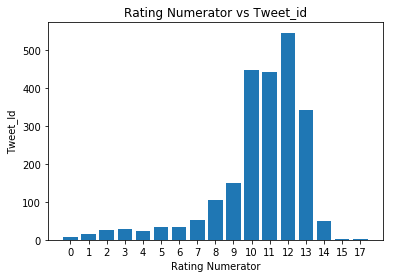

In [48]:
#INSIGHT1 ---- Rating Numerator vs Tweet_id with Visualization

#Intro : 
    #Let's do a analysis on 'We rate dogs',Here we are going to do a insight about how often the page
#is giving same rating for the dog breeds which will help us predicting how many dogs got lower ratings and 
#how many dogs got higher ratings etc.

twitter_archive_master = pd.read_csv('twitter_archive_master.csv') #Open the saved master dataframe

df = twitter_archive_master[twitter_archive_master['Rating_Numerator'] <= 18]

df_group = df.groupby(['Rating_Numerator'])['Tweet_id'].count()

r1 = df_group[0]
r2 = df_group[1]
r3 = df_group[2]
r4 = df_group[3]
r5 = df_group[4]
r6 = df_group[5]
r7 = df_group[6]
r8 = df_group[7]
r9 = df_group[8]
r10 = df_group[9]
r11 = df_group[10]
r12 = df_group[11]
r13 = df_group[12]
r14 = df_group[13]
r15 = df_group[14]
r16 = df_group[15]
r17 = df_group[17]



#Visualization

N=17
locations = np.arange(N)
rating = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17]
labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','17']
plt.bar(locations,rating,tick_label=labels),
plt.xticks(locations)
plt.title('Rating Numerator vs Tweet_id')
plt.xlabel('Rating Numerator')
plt.ylabel('Tweet_Id')

#By Looking at the bar plot between the Rating_Numerator and the Tweet_id. 'We rate dogs' page gave rating as 12 for most of the dogs,
#followed by ranks 10 and 11 and then followed by 13.If you look at the distribution of the plot.. it's more left skewed. Also,
#since we have only plot the graph for rank with whole digits till 17, we cannot really predict the distribution here.But this plot
#give us a good information about the relation between Rating_Numerator and Tweet_id

In [49]:
#INSIGHT 2 --- Most Re-tweeted dog

#Let's find out which breed of dog has been retweeted most number of times.

twitter_archive_master.Retweet_Count.max() #get the max. retweet count

twitter_archive_master.query('Tweet_id==744234799360020481') # Fetch the row details using query method


#So, The most retweeted dog in our dataset is Labrador_retriever with a confidence interval of 0.83 from image predictions analysis
#using neural netwrok.Also it has a impressive Favourite counts of 128452 and it's in doggo stage.we rate dogs gave a rating of 13/10
# for this dog



,Unnamed: 0,Tweet_id,Name,Rating_Numerator,Rating_Denominator,Retweet_Count,Favourite_count,Breed_Prediction_1,Breed_Conf_Intrvl_1,Breed_Prediction_Result_1,...,Breed_Prediction_Result_2,Breed_Prediction_3,Breed_Conf_Intrvl_3,Breed_Prediction_Result_3,Dog_Stage,Timestamp,Text,Source,Jpg_url,Expanded_urls
1039,1039,744234799360020481,None,13.0,10,77466.0,128443.0,Labrador_retriever,0.83,True,...,False,whippet,0.02,True,doggo,2016-06-18,Here's a doggo realizing you can stand in a po...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/ext_tw_video_thumb/74423...,https://twitter.com/dog_rates/status/744234799...


In [50]:
#INSIGHT 3 --- Most Favourite dog

#This time let's take a look at the dog that has the most favourite in our dataset.

twitter_archive_master.Favourite_count.max() #get the max. favourite count

twitter_archive_master.query('Tweet_id==822872901745569793') # Fetch the row details using query method

#Here, the suprising factor is predicting the breed of the dog. Becoz if you see the confidence interval
#for all the three predictions are very less 0.2 > 0.16 > 0.07. Out of 3, let's consider the maximun confidence level so this
# breed of dog is Lakeland_terrier.It also has a good retweet_counts of 49K. But unlike the most retweeted dog,our most
#favourite dog is a puppo but both get rated by the page as 13/10.




,Unnamed: 0,Tweet_id,Name,Rating_Numerator,Rating_Denominator,Retweet_Count,Favourite_count,Breed_Prediction_1,Breed_Conf_Intrvl_1,Breed_Prediction_Result_1,...,Breed_Prediction_Result_2,Breed_Prediction_3,Breed_Conf_Intrvl_3,Breed_Prediction_Result_3,Dog_Stage,Timestamp,Text,Source,Jpg_url,Expanded_urls
413,413,822872901745569793,None,13.0,10,49207.0,143549.0,Lakeland_terrier,0.2,True,...,True,Irish_terrier,0.07,True,puppo,2017-01-21,Here's a super supportive puppo participating ...,"<a href=""http://twitter.com/download/iphone"" r...",https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,https://twitter.com/dog_rates/status/822872901...


In [51]:
#Conclusion:

    #In this Visualization section, we took pretty interesting insights like How the 'we rate dogs' rated the dogs and 
#the visualization plot gave us more detailed information,the most re-tweeted dog, the most favoutire dog. 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0